In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Lets load the cleaned csv file

In [15]:
df = pd.read_csv('data/Cleaned_Data.csv')

In [16]:
df.head()

,Timestamp,Student ID,Aug 19,Aug 20,Aug 21,Aug 22,Aug 23,Payment Received,Jersey Sizes,Payment Date,Date of Birth,Age,Gender,School,Payment Instruction Acknowledgement,Injury Liability Waver,Photograph Release Agreement
0,2024-07-16 13:31:46,DK-201112-0,True,True,True,True,True,2000,34,2024-08-24,2011-12-22,12,Female,DSC International School,True,True,True
1,2024-07-16 14:01:06,DC-201204-1,True,True,True,True,True,2000,36,2024-08-24,2012-04-26,12,Male,ESF Island School,True,True,True
2,2024-07-26 13:45:05,JC-201209-1,True,True,False,True,True,1800,34,2024-08-24,2012-09-12,11,Male,South Island School,True,True,True
3,2024-07-27 06:34:32,EC-201204-1,True,True,False,False,True,0,36,2024-08-24,2012-04-10,12,Male,Hong Kong International School,True,True,True
4,2024-07-27 06:36:31,EC-201410-1,True,True,True,True,True,0,34,2024-08-24,2014-10-27,9,Male,Hong Kong International School,True,True,True


**Goals for Analysis**
* Demographic Visualization
    - Age
    - Gender
    - School
* Customer Turnout Rate
    - Compare old spreadsheet with new cleaned spreadsheet. old sheet student count/cleaned sheet count.
    - Create new series table with just the student ID's including those who didnt attend
* Attendance 
    - Counts for each day plotted on a line graph
    - Check if payments match the attendance ($400/Session)
* Use timestamp data to plot when people are paying
    - Create either time series line plot or a histogram
* Finding Patterns and Correlations
    - Create seaborn heatmap correlation matrix
    - For areas with high correlation investigate why using industry knowledge and create an actionable solution

Age Demographic Visualization

Text(0.5, 1.0, 'Age Distribution')

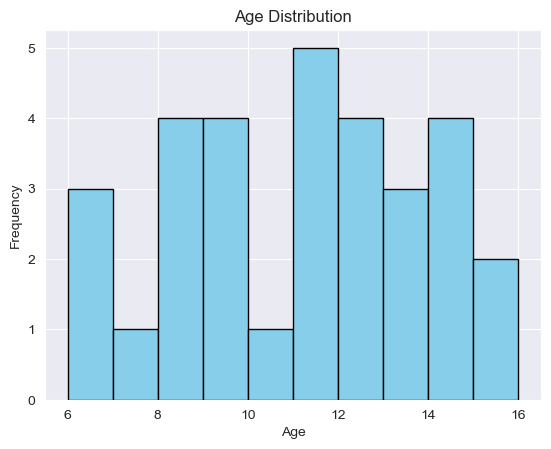

In [17]:
unique_ages = df['Age'].unique()
plt.hist(df['Age'], bins=(len(unique_ages)), color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')

Gender Distribution

Text(0.5, 1.0, 'Gender Distribution')

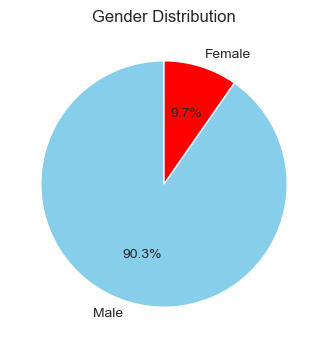

In [18]:
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(4, 4))
# Plotting the pie chart using matplotlib
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'red'])
plt.title('Gender Distribution')

School Distribution


/var/folders/k8/54zwc4911p16cz5tw9zrk4vh0000gn/T/ipykernel_4515/592443698.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='School', data=df, palette='viridis')


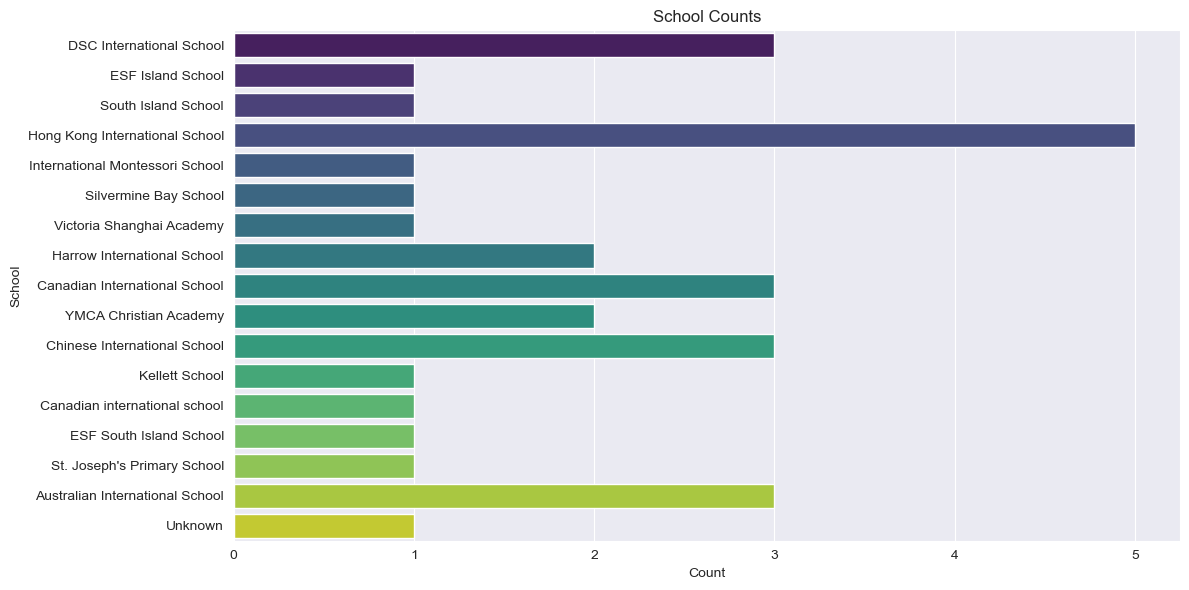

In [19]:
plt.figure(figsize=(12, 6))
sns.countplot(y='School', data=df, palette='viridis')
plt.xlabel('Count')
plt.ylabel('School')
plt.title('School Counts')
plt.tight_layout()
plt.show()

Form Timestamp Visualization

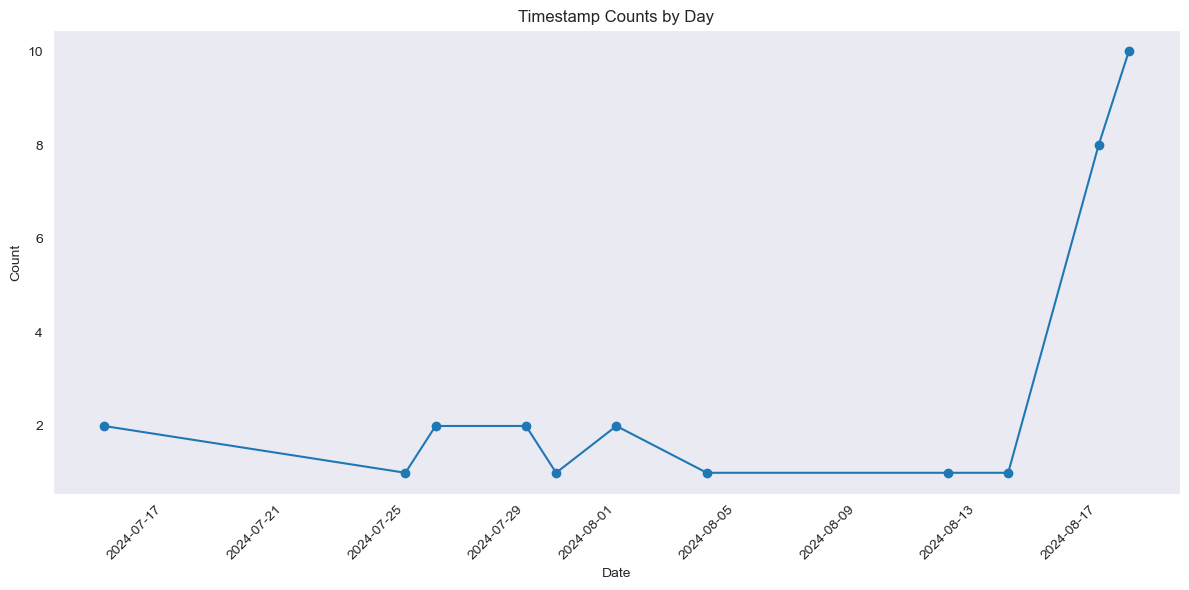

In [20]:
# Extract just the date part from the timestamps
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
dates = df['Timestamp'].dt.date

# Count the occurrences of each date
date_counts = dates.value_counts().sort_index()

# Plotting the counts of timestamps per day
plt.figure(figsize=(12, 6))
plt.plot(date_counts.index, date_counts.values, marker='o')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Timestamp Counts by Day')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

Customer Turnout Rate

In [21]:
old_df = pd.read_csv('/Users/kaiisfly/PycharmProjects/Data_Analytics_Portfolio/basketball_academy/data/Anonymized_Data.csv')
new_df = pd.read_csv ('/Users/kaiisfly/PycharmProjects/Data_Analytics_Portfolio/basketball_academy/data/Cleaned_Data.csv')

dropped_out = len(old_df['Student ID']) - len(new_df['Student ID'])
cust_churn = (dropped_out / len(old_df['Student ID']) * 100)
print(f'Customer Churn for the Camp was {cust_churn:.3g}%')

Customer Churn for the Camp was 8.82%


Attendance over the camp duration

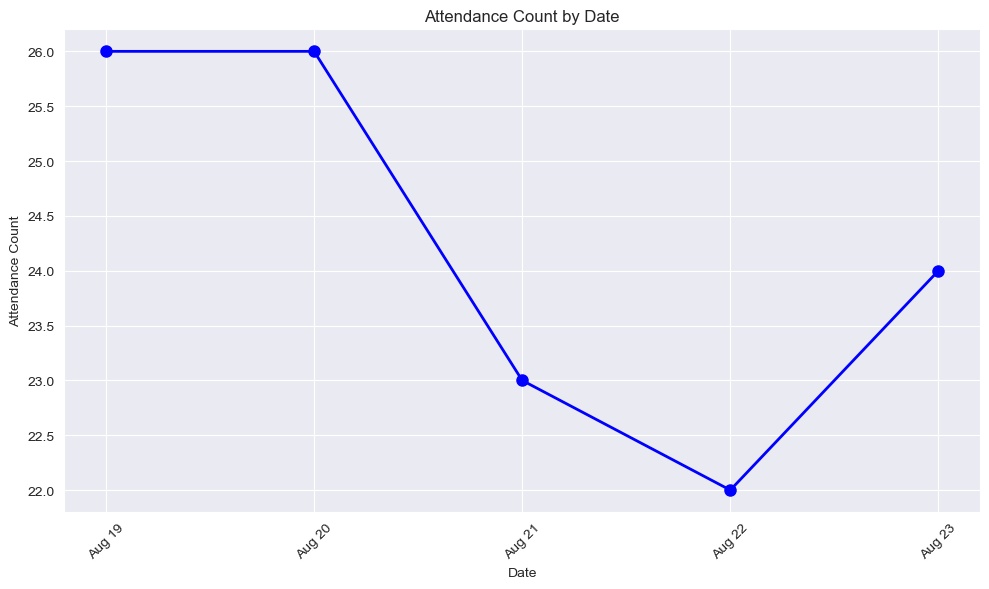

In [27]:
attendance_columns = df.columns[2:7]

# Calculate total attendance count for each date
attendance_counts = df[attendance_columns].sum()

# Plot the attendance counts on a line graph
plt.figure(figsize=(10, 6))
plt.plot(attendance_counts.index, attendance_counts.values, marker='o', color='b', linestyle='-', linewidth=2, markersize=8)
plt.xlabel('Date')
plt.ylabel('Attendance Count')
plt.title('Attendance Count by Date')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/k8/54zwc4911p16cz5tw9zrk4vh0000gn/T/ipykernel_4515/3016515108.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[cols_for_correlation] = df[cols_for_correlation].replace({True: 1, False: 0})


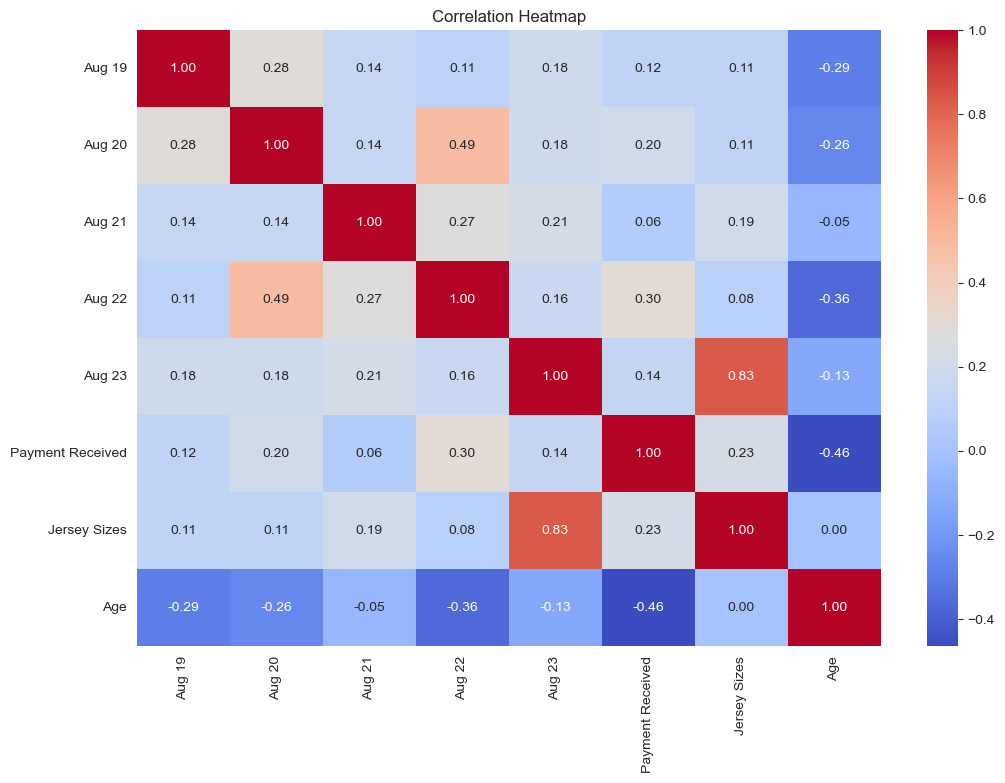

In [29]:
# Select columns for correlation analysis
cols_for_correlation = ['Aug 19', 'Aug 20', 'Aug 21', 'Aug 22', 'Aug 23', 'Payment Received', 'Jersey Sizes', 'Age']

# Encode boolean columns
df[cols_for_correlation] = df[cols_for_correlation].replace({True: 1, False: 0})

# Compute the correlation matrix
correlation_matrix = df[cols_for_correlation].corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()